## Exploratory Data Analysis

After data is cleaned, it can now be used to answer the question of "Where students do aspire to progress to for post-secondary education?".

### Importing required modules

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter

In [222]:
sns.set_theme()
industryTags = ['Arts&Media','Business&Finance','Engineering','Technology','Sciences','Medical','Others/Unsure']
colours = ['#703D57','#B58DB6','#E9C46A','#F4A261','#E76F51','#2A9D8F','#7D938A']
labelFont = {'size':13,'weight':'bold'}

### Reading cleaned data
Read the data from the excel file, storing the sheets into a ordered dictionary. Then, I am changing everything that is not a tagged industry to "Others/Unsure" for easier visualisation.

In [223]:
workbook = pd.read_excel('processedData.xlsx',sheet_name=None)
for sheet, data in workbook.items():
    data[(data['Industry']!='Medical') & (data['Industry']!='Business&Finance') & (data['Industry']!='Arts&Media') & (data['Industry']!='Sciences') & (data['Industry']!='Technology') & (data['Industry']!='Engineering')] = 'Others/Unsure'

### Composition of students
We want to see the composition of the students interested in the different industries, we will use pie charts.
For instance, the first pie chart shows that a large portion of O Level students in 2021 want to enter STEM and Medical fields, these fields make up over half the student population.

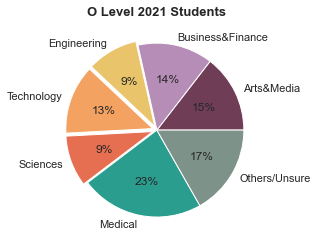

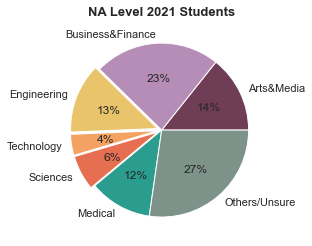

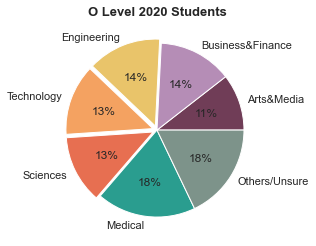

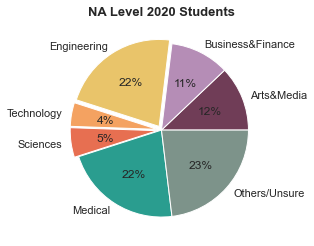

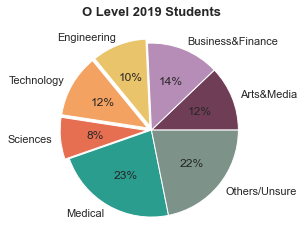

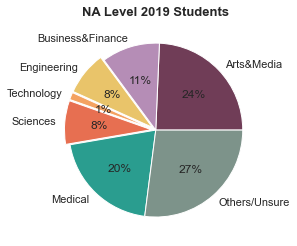

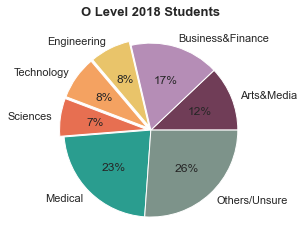

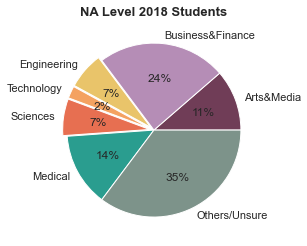

In [224]:
exp = [0] * len(industryTags)
exp[2:5] = [0.05] * 3
for i,(sheet, data) in enumerate(workbook.items()):
    plt.figure(i)
    count = Counter(data['Industry'])
    sizes = [count[tag] for tag in industryTags]
    plt.title(sheet+' Students',fontdict=labelFont)
    plt.pie(sizes,labels=industryTags,explode=exp,autopct='%.0f%%',colors=colours)

### Showing change in composition
Seeing the composition change over time paints a clearer picture for us. A stacked bar chart is a good way to show this. Since only relative changes matter, the heights will be scaled by percentage.

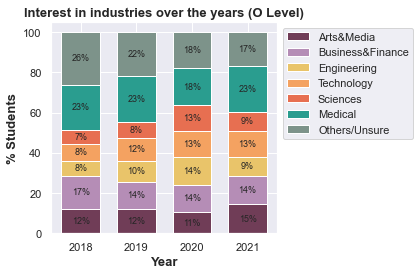

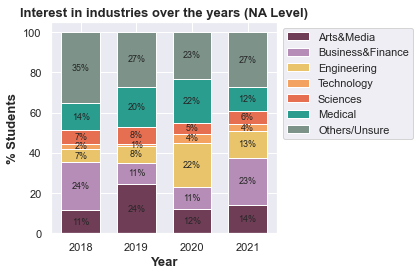

In [225]:
# Calculating the percentages
def calcPct(pctages,years,data):
    years.append(int(sheet[-4:]))
    count = Counter(data['Industry'])
    total = sum(count.values())
    for industry in industryTags:
        pct = count[industry] / total * 100
        pctages[industry].append(pct)
    return pctages, years

oPctages = {i:[] for i in industryTags}
oYears = []
naPctages = {i:[] for i in industryTags}
naYears = []
for sheet, data in workbook.items():
    if sheet.startswith('O'):
        calcPct(oPctages,oYears,data)
    else:
        calcPct(naPctages,naYears,data)

# Visualising percentages with a graph
def drawStackedBar(years,pctages,title,i):
    plt.figure(i)
    startHeight = [0]*len(years)
    for i,industry in enumerate(industryTags):
        bars = plt.bar(years,pctages[industry],label=industry,bottom=startHeight,color=colours[i],width=0.7,tick_label=years)
        startHeight = np.add(startHeight,pctages[industry])
        for i,rect in enumerate(bars):
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width() / 2.,startHeight[i]-(height/2), f'{height:.0f}%', ha="center", va="center", fontsize=9)
    plt.legend(loc='upper left',bbox_to_anchor=(1,1))
    plt.ylabel('% Students',fontdict=labelFont)
    plt.xlabel('Year',fontdict=labelFont)
    plt.title(title,fontdict=labelFont)
    plt.tight_layout()
drawStackedBar(oYears,oPctages,'Interest in industries over the years (O Level)',9)
drawStackedBar(naYears,naPctages,'Interest in industries over the years (NA Level)',10)

## Change by industry
Which industry has changed the most/least? A box plot shows this.

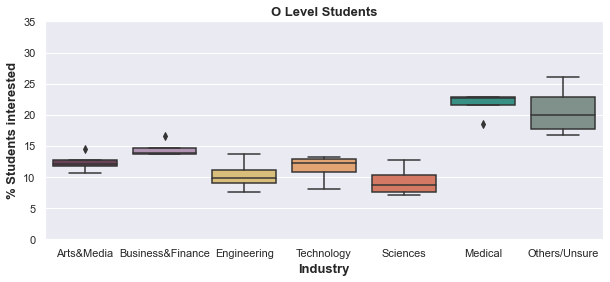

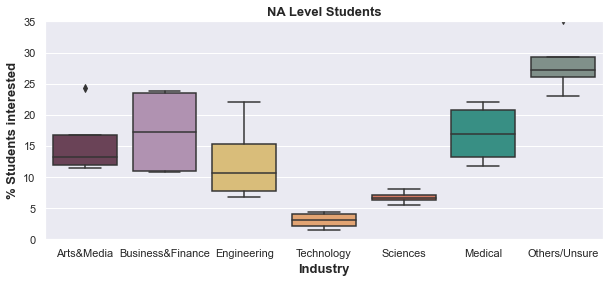

In [226]:
def drawBoxPlot(pctages,i,title):
    plt.figure(i,figsize=(10,4))
    df = {'Industry':[],'% Student':[]}
    for industry, iPctages in pctages.items():
        for pct in iPctages:
            df['Industry'].append(industry)
            df['% Student'].append(pct)
    df = pd.DataFrame(df)
    sns.boxplot(x='Industry',y='% Student',data=df,palette=colours)
    plt.ylabel('% Students interested',fontdict=labelFont)
    plt.xlabel('Industry',fontdict=labelFont)
    plt.title(title,fontdict=labelFont)
    plt.ylim(0,35)

drawBoxPlot(oPctages,1,'O Level Students')
drawBoxPlot(naPctages,2,'NA Level Students')